In [7]:
import common.life_cycle as t4p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from common.childbearing import Childbearing
from common.death import Death
from common.expense import expense
from common.income import income
from common.life_cycle import person
from common.life_events import life_events
from common.marriage import Marriage
from common.purchase_house import Purchase_house
from common.retirement import Retirement
import os
from tool4cal import annuity
from tool4plot import deficit_color

## Profile
* Name: Wilson 
  
* Age: 24
  
* Sex: Male
  
* Job: China Development Bank, HK branch, Graduate Program

* Major: Accountancy

## Life Events
### Purchase House
- Age: 29
- Location: ShenZhen City, Futian Area, XiaSha District, around Kkone Ground
- Area: 100
- Price: 6210000
- Interest rate: 0.049

In [8]:
# Purchase House
Purchase_house_1 = t4p.Purchase_house(purchase_house=29,
                                location='ShenZhen City Kkone',
                                area=100,
                                price=6210000,
                                down_payment_ratio=0.2,
                                mortgage_ir= 0.049,
                                renovation=0,
                                furniture=0,
                                appliances=0)
Purchase_house_1.describe()

Purchase house age: 29
Location: ShenZhen City Kkone
Area: 100
Price: 6210000
Down payment ratio: 1242000.0
Loan: 4968000.0
Interest rate: 0.049
Renovation: 0
Furniture: 0
Appliances: 0
Monthly mortgage: 26366.503480540952


### Marriage
- Age: 32
- Couple: his girlfriend Miss A
- Wedding location: PingXiang City and NanChang City, JiangXi Province, Mainland China
- For wedding in PingXiang 
- Tables: 20 tables 1200 yuan per table
- Accommodation for relatives of Miss A: 10000 yuan
- Honeymoon(20000), ceremony(16000), wine(10000) and jewelry(30000) respectively

In [9]:
# Marriage
Marriage_1 = t4p.Marriage(marriage=32,
                    location='PingXiang City MeiYuan hotel',
                    tables=20,
                    unit_price=1200,
                    ceremony=16000,
                    accommodation=10000,
                    honeymoon=20000,
                    wine=10000,
                    jewelry=30000,
                    )
Marriage_1.describe()

Marriage age: 32
Location: PingXiang City MeiYuan hotel
Number of tables: 20
Unit price of table: 1200
Ceremony: 16000
Accommodation: 10000
Wine: 10000
Honeymoon: 20000
Jewelry: 30000
Total: 110000


### Childbearing
- Age: 34
- Preparation(10000) and birth(10000)
- Postpartum recovery center: 20000
- Kinergarden: 10000
- Primary School: 36000
- Middle School: 36000
- High School: 60000
- College: 60000

In [10]:
# Childbearing
Childbearing_1 = t4p.Childbearing(childbearing=34,
                                  preparation=10000,
                                  birth=10000,
                                  postpartum_recovery=20000,
                                  kindergarden=10000,
                                  primary_school=36000,
                                  middle_school=36000,
                                  high_school=60000,
                                  college=60000)
Childbearing_1.describe()

Age of childbearing: 34
Expense of preparation: 10000
Expense of birth: 10000
Expense of postpartum recovery: 20000
Expense of kindergarden: 10000
Expense of primary school: 36000
Expense of middle school: 36000
Expense of high school: 60000
Expense of college: 60000


### Retirement
- Age: 65
### Death 
- Age: 85
- Pessimistic: 

In [11]:
# Retirement
Retirement_1 = t4p.Retirement(retirement=65)
Retirement_1.describe()
# Death
Death_1 = t4p.Death(85)
Death_1.describe()

Retirement age: 65
Death: 85


### Income
- Initial payment: 20000 HKD(we treat as CNY for convenience)
- Increase rate: 0.1
- Stop at: 35
- Taxed by HK tax

In [12]:
life_events_1 = t4p.life_events(Marriage_1, Purchase_house_1, Childbearing_1, Retirement_1, Death_1)
# Income
income_1 = t4p.income(salary=20000,
                      increase_rate=0.1,
                      MPF_rate=0.05,
                      stop_age=35)
income_1.describe()

Salary: 20000
Increase_rate: 0.1
MPF_rate: 0.05
Annual_tax: 22800.0
Increase_stop_age: 35


### Expense
- Expense = normal expense + rent + contingency expense
- Normal expense: 6000
- Rent: 8000
- Contingency expense: 1000

In [13]:
# Expense
expense_1 = t4p.expense(monthly_expense=6000, rent=8000, contingency_expense=1000)
expense_1.describe()

Monthly_expense: 6000
Rent: 8000
Contingency_expense: 1000


In [14]:
# Person
person_1 = t4p.person('Wilson', 24, life_events_1, income_1, expense_1)

Wilson is 24 now.


In [20]:
# First 10 years
person_1.cash_flow_table.head(10)

,age,marriage,purchase_house,childbearing,retirement,monthly_income,monthly_expense,year_balance,accumulated_balance
24,24,0.00,0.00,0.00,0.00,"18,100.00","15,000.00","37,200.00","37,200.00"
25,25,0.00,0.00,0.00,0.00,"19,760.00","15,000.00","57,120.00","94,320.00"
26,26,0.00,0.00,0.00,0.00,"21,586.00","15,000.00","79,032.00","173,352.00"
27,27,0.00,0.00,0.00,0.00,"23,594.60","15,000.00","103,135.20","276,487.20"
28,28,0.00,0.00,0.00,0.00,"25,804.06","15,000.00","129,648.72","406,135.92"
29,29,0.00,"1,558,398.04",0.00,0.00,"28,234.47","7,000.00","-1,303,584.45","-897,448.53"
30,30,0.00,"316,398.04",0.00,0.00,"30,907.91","7,000.00","-29,503.09","-926,951.62"
31,31,0.00,"316,398.04",0.00,0.00,"33,848.70","7,000.00","5,786.40","-921,165.22"
32,32,"110,000.00","316,398.04",0.00,0.00,"37,083.57","7,000.00","-65,395.15","-986,560.37"
33,33,0.00,"316,398.04",0.00,0.00,"40,641.93","7,000.00","87,305.14","-899,255.23"


In [19]:
# Last 21 years
person_1.cash_flow_table.tail(21)

,age,marriage,purchase_house,childbearing,retirement,monthly_income,monthly_expense,year_balance,accumulated_balance
65,65,0.00,0.00,0.00,"7,743,456.39","48,861.74","7,000.00","8,245,797.24","13,817,091.86"
66,66,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,733,091.86"
67,67,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,649,091.86"
68,68,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,565,091.86"
69,69,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,481,091.86"
70,70,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,397,091.86"
71,71,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,313,091.86"
72,72,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,229,091.86"
73,73,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,145,091.86"
74,74,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,061,091.86"


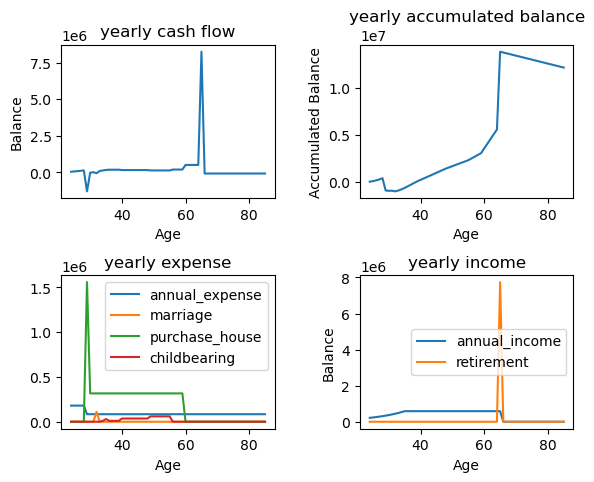

In [21]:
df = person_1.cash_flow.copy()
# yearly cash flow
plt.subplot(2, 2, 1)
plt.plot(df['year_balance'])
plt.title('yearly cash flow')
plt.xlabel('Age')
plt.ylabel('Balance')

# accumulated balance
plt.subplot(2, 2, 2)
plt.plot(df['accumulated_balance'])
plt.title('yearly accumulated balance')
plt.xlabel('Age')
plt.ylabel('Accumulated Balance')

# yearly expense
plt.subplot(2, 2, 3)
plt.plot(df['annual_expense'], label='annual_expense')
plt.plot(df['marriage'], label='marriage')
plt.plot(df['purchase_house'], label='purchase_house')
plt.plot(df['childbearing'], label='childbearing')
plt.title('yearly expense')
plt.legend()
plt.xlabel('Age')

# yearly income
plt.subplot(2, 2, 4)
plt.plot(df['annual_income'], label='annual_income')
plt.plot(df['retirement'], label='retirement')
plt.title('yearly income')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Balance')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

## Problems and Demands
### Unsmooth income and expense in specific periods

1. huge deficit when down payment and big surplus when retirement
  
2. tight budget to purchase a house before marriage

3. difficult to pay mortgage along
  
### Targets to achieve

1. a saving plan for kid's housing problem
  
2. an inheritence for the next generation family

## Advices and Plan
### Unsmooth income and expense

1. huge deficit when down payment and big surplus when retirement
- __Design a monthly saving plan before house purchasing and a pesion management scheme__<span style="color: green;">(Accepted)</span>
  
2. tight budget to purchase a house before marriage
- __Seek help from parents__<span style="color: green;">(Accepted)</span>
  
3. difficult to pay mortgage along
- __Take the other's income into consideration__<span style="color: red;">(Rejected)</span>

  
### Targets to achieve

1. a saving plan for kid's housing problem
  
2. an inheritence for the next generation family

In [22]:
# period before house purchase
person_1.cash_flow_table.head(10)

,age,marriage,purchase_house,childbearing,retirement,monthly_income,monthly_expense,year_balance,accumulated_balance
24,24,0.00,0.00,0.00,0.00,"18,100.00","15,000.00","37,200.00","37,200.00"
25,25,0.00,0.00,0.00,0.00,"19,760.00","15,000.00","57,120.00","94,320.00"
26,26,0.00,0.00,0.00,0.00,"21,586.00","15,000.00","79,032.00","173,352.00"
27,27,0.00,0.00,0.00,0.00,"23,594.60","15,000.00","103,135.20","276,487.20"
28,28,0.00,0.00,0.00,0.00,"25,804.06","15,000.00","129,648.72","406,135.92"
29,29,0.00,"1,558,398.04",0.00,0.00,"28,234.47","7,000.00","-1,303,584.45","-897,448.53"
30,30,0.00,"316,398.04",0.00,0.00,"30,907.91","7,000.00","-29,503.09","-926,951.62"
31,31,0.00,"316,398.04",0.00,0.00,"33,848.70","7,000.00","5,786.40","-921,165.22"
32,32,"110,000.00","316,398.04",0.00,0.00,"37,083.57","7,000.00","-65,395.15","-986,560.37"
33,33,0.00,"316,398.04",0.00,0.00,"40,641.93","7,000.00","87,305.14","-899,255.23"


### Plan 1
- Saving 80% of surplus per month for first 5 years and take out when 29 year-old
- Parents support 1,500,000 yuan for down payment

In [23]:
# Plan1: saving plan between 24 and 28
df = person_1.cash_flow.loc[24:28][['monthly_income', 'monthly_expense']]
monthly_residual = df['monthly_income'] - df['monthly_expense']
monthly_residual_per_year = monthly_residual.values
class plan1:
    def __init__(self, return_rate, support):
        self.return_rate = return_rate
        self.support = support
    
    # monthly_amount = (montly_income - monthly_expense) * 0.8
    def monthly_amount(self, residual):
        result = []
        for i in residual:
            year_series = [i*0.8]*12
            result.extend(year_series)
        return result
    
    # calucate the fv of the monthly_amount
    def cal_fv(self, residual):
        cash_flow = self.monthly_amount(residual)
        balance = 0
        for i in range(len(cash_flow)):
            balance = (balance + cash_flow[i])*(1+self.return_rate/12)
        return balance
    
    # create lifelong cash flow series: saving plan + parents help
    # 24-28 periods cash flow out and 29 cash flow in 
    def apply_plan(self, residual):
        data = [0 for i in range(24, 85+1)]
        for i in range(0, 5):
            data[i] = -residual[i]*12
        data[5] = self.cal_fv(residual) + self.support
        return pd.Series(data, index=range(24, 85+1))
    
    # cal asset value series
    def asset_value(self, residual):
        data = [0 for i in range(24, 85+1)]
        cash_flow = self.monthly_amount(residual)
        value = 0 
        for i in range(len(cash_flow)):
            value = (value + cash_flow[i])
            if (i+1)%12 == 0:
                data[(i+1)//12] = value
        return pd.Series(data, index=range(24, 85+1))

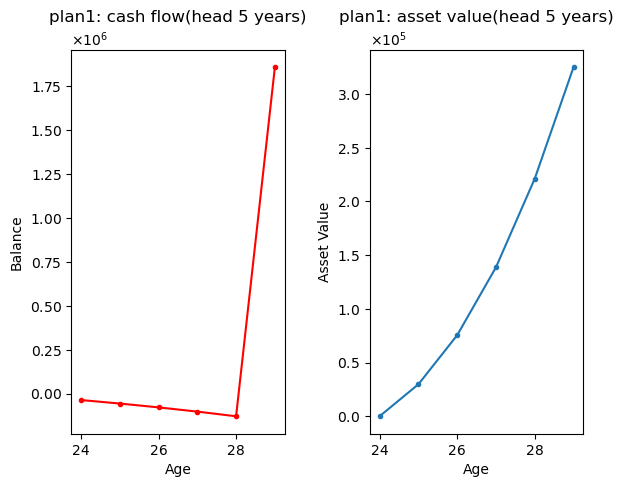

In [24]:
plan4house = plan1(0.05, 1500000)
plan4house.cal_fv(monthly_residual_per_year)

# cash flow
plt.subplot(1, 2, 1)
plt.title('plan1: cash flow(head 5 years)')
plt.xlabel('Age')
plt.ylabel('Balance') 
plt.plot(plan4house.apply_plan(monthly_residual_per_year)[:6], 'r', marker='.', linestyle='-')
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# asset value
plt.subplot(1, 2, 2)
plt.title('plan1: asset value(head 5 years)')
plt.xlabel('Age')
plt.ylabel('Asset Value')
plt.plot(plan4house.asset_value(monthly_residual_per_year)[:6], marker='.', linestyle='-')
# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

In [28]:
# period after retirement
person_1.cash_flow_table.loc[65, 'accumulated_balance']
print('When retire, the accumulated balance is: ', person_1.cash_flow_table.loc[65, 'accumulated_balance'] + ' yuan', sep='\n')
person_1.cash_flow_table.tail(21)

When retire, the accumulated balance is: 
13,817,091.86 yuan


,age,marriage,purchase_house,childbearing,retirement,monthly_income,monthly_expense,year_balance,accumulated_balance
65,65,0.00,0.00,0.00,"7,743,456.39","48,861.74","7,000.00","8,245,797.24","13,817,091.86"
66,66,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,733,091.86"
67,67,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,649,091.86"
68,68,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,565,091.86"
69,69,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,481,091.86"
70,70,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,397,091.86"
71,71,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,313,091.86"
72,72,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,229,091.86"
73,73,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,145,091.86"
74,74,0.00,0.00,0.00,0.00,0.00,"7,000.00","-84,000.00","13,061,091.86"


### Plan 2
- Pension per month for 65-68: 26500 per month
- Support Child for purchasing house: 5,000,000 yuan
- Leave an inheritence at 85

In [29]:
# Plan2: pesion management scheme
# from 65-85, recieve 26500 as pension
# at 70, gift for child to purchase house, 5000000
# at 85, inheritence
class plan2:
    def __init__(self, initial_balance, monthly_pesion, gift, interest_rate):
        self.balance = initial_balance
        self.pension = monthly_pesion
        self.gift = gift
        self.ir = interest_rate
        self.pension_pv = self.pension_pv()
        self.gift_pv = self.gift_pv()
        self.inheritence_fv = self.inheritence_fv()
        assert self.balance >= self.pension_pv + self.gift_pv, 'balance is not enough for gift and pension'
    
    def pension_pv(self):
        pv = annuity(self.pension, self.ir, 20)
        return pv
    
    def gift_pv(self):
        pv = self.gift/(1+self.ir)**(70 - 65)
        return pv
    
    def inheritence_fv(self):
        fv = (self.balance - self.pension_pv - self.gift_pv)*(1+self.ir)**(85 - 65)
        return fv
    
    def apply_plan(self):
        data = [0 for i in range(24, 85+1)]
        data[65-24] = - self.balance
        # data[70-24] = - self.gift
        # data[85-24] = self.inheritence_fv
        for i in range(65-24, 85-24+1):
            data[i] += self.pension*12
        return pd.Series(data, index=range(24, 85+1))
    
    # cal asset value series
    def asset_value(self):
        data = [0 for i in range(24, 85+1)]
        # gift value
        for i in range(5):
            gift_value = self.gift_pv*(1+self.ir)**(i+1)
            data[65-24+i] += gift_value
        # pension value
        for i in range(1, 21):
            pension_value = annuity(self.pension, self.ir, 20-i)
            data[65-24+i] += pension_value
        # inheritence value
        for i in range(20):
            inheritence_value = self.inheritence_fv/(1+self.ir)**(i+1)
            data[85-24-i] += inheritence_value
        return pd.Series(data, index=range(24, 85+1))

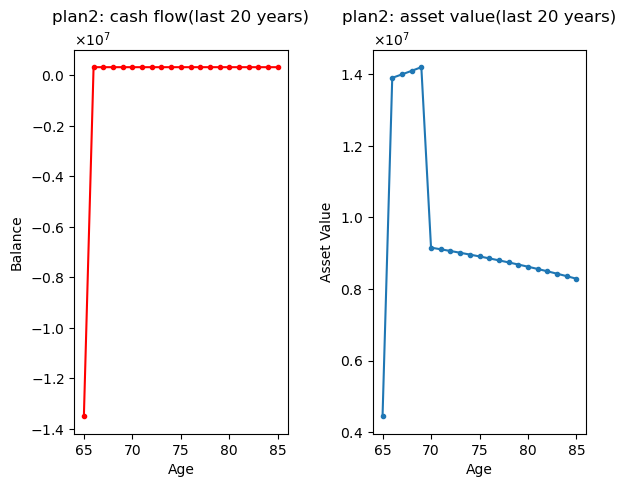

In [30]:
plan4retirement = plan2(person_1.cash_flow.loc[65, 'accumulated_balance'], 26500, 5000000, 0.03)
# cash flow
plt.subplot(1, 2, 1)
plt.title('plan2: cash flow(last 20 years)')
plt.xlabel('Age')
plt.ylabel('Balance') 
plt.plot(plan4retirement.apply_plan()[-21:], 'r',marker='.', linestyle='-')
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# asset value
plt.subplot(1, 2, 2)
plt.title('plan2: asset value(last 20 years)')
plt.xlabel('Age')
plt.ylabel('Asset Value')
plt.plot(plan4retirement.asset_value()[-21:], marker='.', linestyle='-')
# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

### Lifetime Cash Flow and Asset Value

In [31]:
df1 = person_1.cash_flow.copy()
df1['plan4house_cash_flow'] = plan4house.apply_plan(monthly_residual_per_year)
df1['plan4retirement_cash_flow'] = plan4retirement.apply_plan()
df1['plan4house_asset_value'] = plan4house.asset_value(monthly_residual_per_year)
df1['plan4retirement_asset_value'] = plan4retirement.asset_value()
df1['Adjusted_balance'] = df1['year_balance'] + df1['plan4house_cash_flow'] + df1['plan4retirement_cash_flow']
df1['Adjusted_accumlated'] = df1['Adjusted_balance'].cumsum()
df1['Adjusted_accumlated'] = df1['Adjusted_accumlated'] + df1['plan4house_asset_value'] + df1['plan4retirement_asset_value']

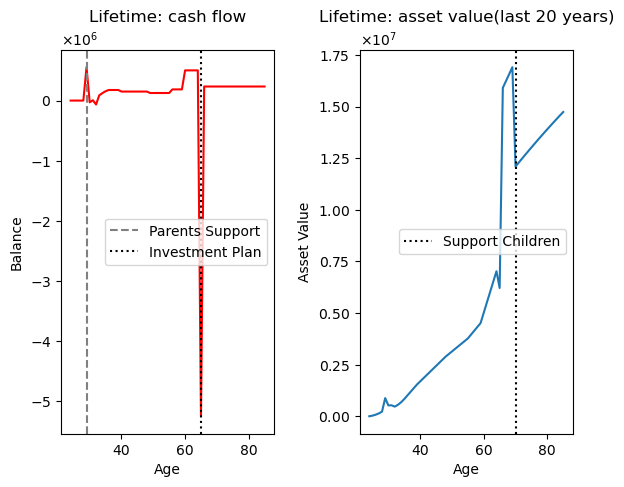

In [32]:
# cash flow
plt.subplot(1, 2, 1)
plt.title('Lifetime: cash flow')
plt.xlabel('Age')
plt.ylabel('Balance') 
plt.plot(df1['Adjusted_balance'], 'r', linestyle='-')
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
vertical_line_x = 29  
plt.axvline(x=vertical_line_x, color='gray', linestyle='--', label='Parents Support')
vertical_line_x = 65  
plt.axvline(x=vertical_line_x, color='black', linestyle=':', label='Investment Plan')
plt.legend()


# asset value
plt.subplot(1, 2, 2)
plt.title('Lifetime: asset value(last 20 years)')
plt.xlabel('Age')
plt.ylabel('Asset Value')
plt.plot(df1['Adjusted_accumlated'], linestyle='-')
# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
vertical_line_x = 70 
plt.axvline(x=vertical_line_x, color='black', linestyle=':', label='Support Children')
plt.legend()

## Summary
### Conclusion
- Risk reveal
- Habit of saving and investment
### Downsides
- Use naive assumptions on financial tools(fix interest rate and lack consideration of fluency)
- Too optimistic about future income
- Limited of other expense like car purchase and spending on children

In [1]:
!jupyter nbconvert --to html FinancialPlan.ipynb

[NbConvertApp] Converting notebook FinancialPlan.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 573656 bytes to FinancialPlan.html


In [2]:
# convert to slides
!jupyter nbconvert --to slides FinancialPlan.ipynb --post serve 

[NbConvertApp] WARNING | Config option `reveal_transition_speed` not recognized by `SlidesExporter`.  Did you mean `reveal_transition`?
[NbConvertApp] Converting notebook FinancialPlan.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 574654 bytes to FinancialPlan.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/FinancialPlan.slides.html
Use Control-C to stop this server
404 GET /favicon.ico (127.0.0.1) 1.15ms
^C

Interrupted
